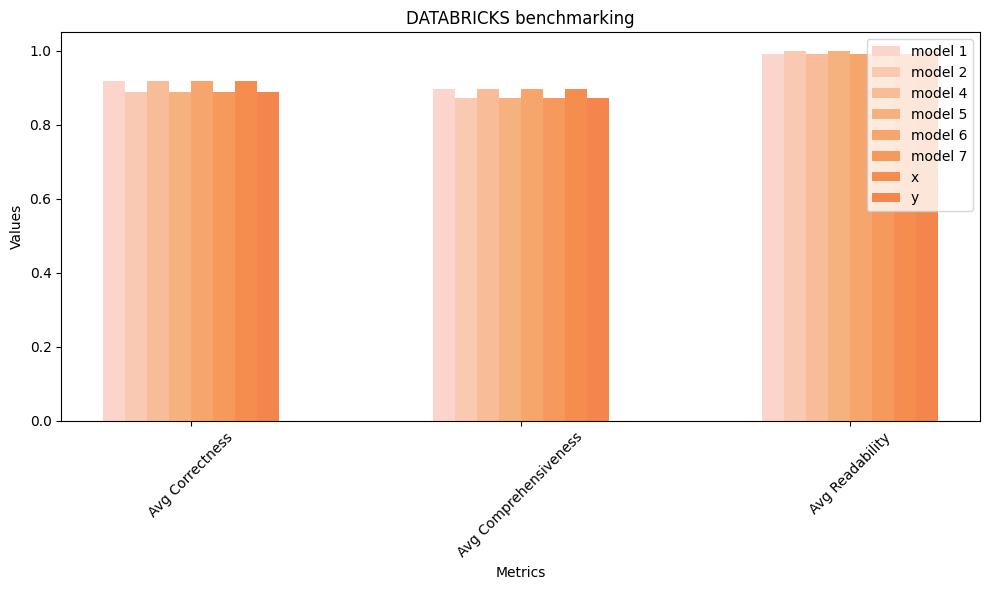

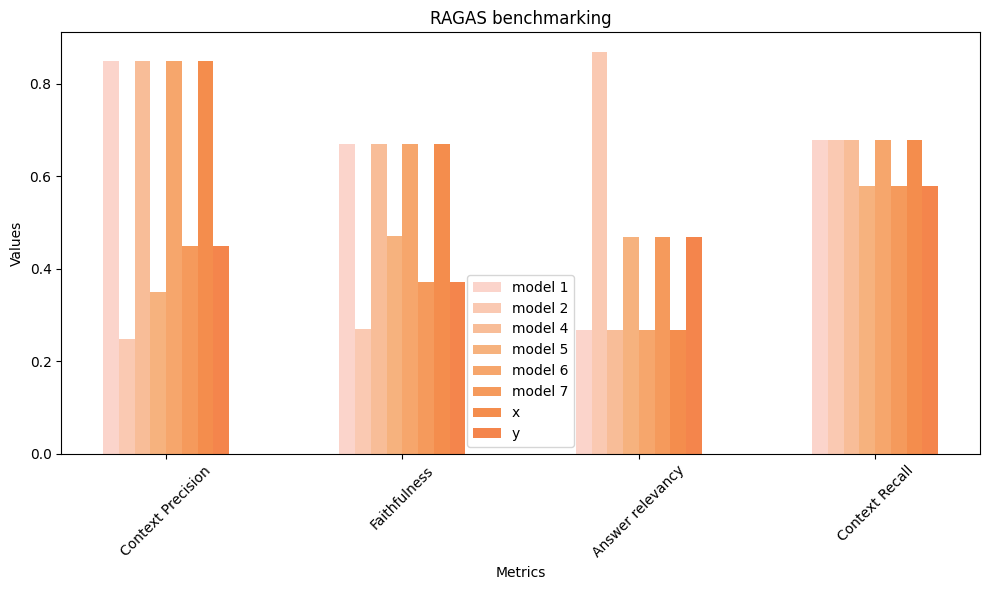

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

def plot_from_json(json_file):
    # Load JSON data
    with open(json_file, 'r') as file:
        data = json.load(file)

    # Extract model names and colors
    model_names = next(item for item in data if item.get("name") == "model names")["model_names"]
    colors = next(item for item in data if item.get("name") == "colors")["colors"]

    # Iterate through each benchmarking dataset
    for item in data:
        if "Metrics" in item and "Values" in item:
            create_grouped_bar_chart_colored(item, item["Name"], column_names=model_names, colors=colors[:len(model_names)])

def create_grouped_bar_chart_colored(data, chart_title='', column_names=None, colors=None, gap_between_metrics=1.5):
    metrics = data["Metrics"]
    values = np.array(data["Values"]).T
    df = pd.DataFrame(values, columns=column_names, index=metrics)

    num_sets = len(data["Values"])
    if colors is None:
        colors = plt.cm.viridis(np.linspace(0, 1, num_sets))

    n_groups = len(metrics)
    bar_width = 0.1
    index = np.arange(n_groups) * gap_between_metrics

    fig, ax = plt.subplots(figsize=(10, 6))

    for i, column in enumerate(df.columns):
        bar_positions = index + (i * bar_width)
        ax.bar(bar_positions, df[column], bar_width, label=column, color=colors[i])

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title(chart_title)
    ax.set_xticks(index + bar_width * (num_sets - 1) / 2)
    ax.set_xticklabels(metrics)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Use the function with your JSON file
plot_from_json("config.json")
